# Exploratory Data Analysis (EDA) on BPOS Game Simulation
<br><br>
Link: https://bpos.e4s.games/
<br><br>
A statistical analysis on the performance of the factory in the BPOS game simulation that simulates a supply chain network and supply chain processes via a fun, interactive, and user-friendly interface.

## Imports & Database Connection

In [3]:
import pymysql
import pandas

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

In [5]:
# plot style
sns.set()

In [6]:
# Connecting to the database
connection = pymysql.connect(
    host="bpos.e4s.games",
    user="15102706",
    password="15102706",
    db="BRCIVWET"
)

## Data Exploration

### Backlog table

In [54]:
backlog = pandas.read_sql_query("SELECT * FROM backlog", connection)

In [30]:
backlog

,round,product,amount
0,1,prod05,0
1,1,prod06,0
2,1,prod07,0
3,1,prod08,0
4,2,prod05,0
...,...,...,...
947,239,prod08,0
948,240,prod05,0
949,240,prod06,0
950,240,prod07,0


In [20]:
backlog["amount"].unique()

array([    0,  2000,  5000,   100,     1,  2203,   500,  3000,  4200,
        1000, 12000, 10000,  3001,  4000,   200,  6000, 15000,  8000,
       21000, 17000, 14000, 22000, 19000, 16000,  5400,  1500,  3400,
        2400,  2600, 18000,  4300,  4400,  2800, 18300,  6400,  6200,
       19200,  4100,  1100, 20000, 13000,  7000,  9000,  5500,   400,
         600,  6300, 12800,  9800,   900, 24000,  2200,  1900,  5900,
        7200, 15800, 48000, 13800, 25400, 24600,   300, 25200,  7800,
       16600,  8600,  2480,  9480,  6480, 13480, 13060, 38000, 29280,
        3680,   800, 60000, 15660,  3240,  1600,  8240,  3300, 14400,
       26000, 27000, 11000, 51000, 36100, 30000, 50000, 40000, 25000,
        4500,  6500, 39000, 49000, 80000, 76000, 66000, 36000, 56000,
       70000, 23000,  7001, 17001,  2001], dtype=int64)

In [21]:
backlog[backlog["amount"] == 0]

,round,product,amount
0,1,prod05,0
1,1,prod06,0
2,1,prod07,0
3,1,prod08,0
4,2,prod05,0
...,...,...,...
947,239,prod08,0
948,240,prod05,0
949,240,prod06,0
950,240,prod07,0


In [22]:
598 / 952 * 100

62.81512605042017

Out of 952 rows, 598 rows of the 'backlog' table consists of zeroes. This means that during these rounds, no backlog was formed. Unfortunately, this large number accounts for ~63% of the backlog tables data meaning no real statistical inferences can be generalised to the population. In simpler terms, assumptions about the whole dataset cannot be made as there is a significant percentage of the data that is "unaccounted for".

With additional context, this "empty" dataset presents a positive reflection on the performance of sales and production. With only about 38% of orders being backlogged, more than 60% of the orders are fulfilled on time. While 60% is not a great enough number to consider for success, it does reveal the potential for improvement and growth.

In [24]:
backlog["product"].unique()

array(['prod05', 'prod06', 'prod07', 'prod08'], dtype=object)

In [27]:
products = pandas.read_sql_query("SELECT * FROM products", connection)

In [28]:
products

,productId,name,supplier,customer
0,prod01,Polyethylene,base,tier-4
1,prod02,Iron,base,tier-4
2,prod03,Diode,base,tier-4
3,prod04,Rubber,base,tier-4
4,prod05,Cover,tier-4,tier-3
5,prod06,Screw,tier-4,tier-3
6,prod07,LED,tier-4,tier-3
7,prod08,Grill,tier-4,tier-3


In [32]:
# Renaming the 'product' column in the backlog table to be more descriptive
backlog["product"] = backlog["product"].map({"prod05": "Cover", "prod06": "Screw", "prod07": "LED", "prod08": "Grill"})

In [33]:
backlog

,round,product,amount
0,1,Cover,0
1,1,Screw,0
2,1,LED,0
3,1,Grill,0
4,2,Cover,0
...,...,...,...
947,239,Grill,0
948,240,Cover,0
949,240,Screw,0
950,240,LED,0


In [35]:
backlog.groupby("product")["amount"].sum()

product
Cover     546700
Grill     624244
LED       728845
Screw    2212701
Name: amount, dtype: int64

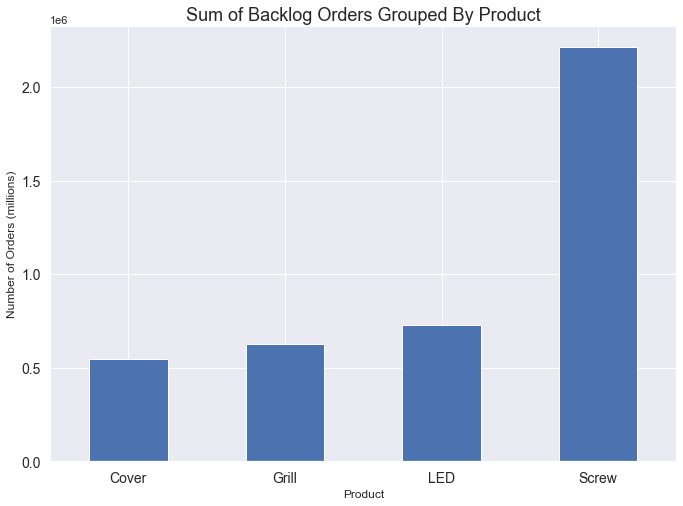

In [50]:
backlog.groupby("product")["amount"].sum().plot(kind="bar",
                                               figsize=(10, 8),
                                               ylabel="Number of Orders (millions)",
                                               xlabel="Product",
                                               fontsize=14)

plt.title("Sum of Backlog Orders Grouped By Product", fontsize=18)
plt.xticks(rotation=0)
plt.show()

As seen in the visualisation above, Screws appear as the product with the highest number of backlog orders. Fortunately, this phenomenon was observed while playing the game. As the rounds progressed, the number of screws ordered by the customer changed drastically. The orders remained inconsistent. With only one perspective, being that of the production function, no real conclusions can be drawn from this phenomenon as additional context would be needed. 

One thing to note is that even though efforts were made to increase the number of screws produced and subsequently sold, the amounts ordered increased as well. This in turn hurt efforts to maintain a consistent supply of other goods, being Covers, Grills, and LEDs. The suprising thing, however, was that demand only really increased for screws while the demand for other products remained steady. Without additional context, it would be foolish to suggest that production efforts be geared predominantely towards the production of screws to meet this demand. It is important to keep in mind though.

### Inbound Amounts table

In [51]:
products

,productId,name,supplier,customer
0,prod01,Polyethylene,base,tier-4
1,prod02,Iron,base,tier-4
2,prod03,Diode,base,tier-4
3,prod04,Rubber,base,tier-4
4,prod05,Cover,tier-4,tier-3
5,prod06,Screw,tier-4,tier-3
6,prod07,LED,tier-4,tier-3
7,prod08,Grill,tier-4,tier-3


In [55]:
inbound_amounts = pandas.read_sql_query("SELECT * FROM inboundAmounts", connection)

C:\Users\richj\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [56]:
inbound_amounts

,deliveryId,round,timestamp,supplier,customer,product,amount
0,4,2,2023-09-12 11:29:32,base,tier-4,prod01,2000
1,4,2,2023-09-12 11:29:32,base,tier-4,prod02,2000
2,4,2,2023-09-12 11:29:32,base,tier-4,prod03,2000
3,4,2,2023-09-12 11:29:32,base,tier-4,prod04,2000
4,17,4,2023-09-12 11:31:33,base,tier-4,prod01,30000
...,...,...,...,...,...,...,...
1263,2413,239,2023-09-15 11:13:33,base,tier-4,prod04,0
1264,2414,239,2023-09-15 11:13:33,base,tier-4,prod01,0
1265,2414,239,2023-09-15 11:13:33,base,tier-4,prod02,0
1266,2414,239,2023-09-15 11:13:33,base,tier-4,prod03,0


#### Inbound Amounts Data Preprocessing

In [60]:
inbound_amounts["product"].unique()

array(['prod01', 'prod02', 'prod03', 'prod04', 'prod09', 'prod10',
       'prod11', 'prod12'], dtype=object)

In [61]:
inbound_amounts.groupby("product").sum()

,deliveryId,round,amount
product,,,
prod01,366719,37004,6231027
prod02,366719,37004,4310020
prod03,366719,37004,2239500
prod04,366719,37004,2820520
prod09,446,51,0
prod10,446,51,0
prod11,446,51,8000
prod12,446,51,3000


The table above provides a summary of the data found in the `inboundAmounts` table, indicating 8 products that are ordered to the factory from the supplier. With no additional information `prod09 - prod12`, these rows will be removed from the dataset and will not be analysed. The other four products, which will be renamed to be more descriptive, will be carried into this analysis.

In [62]:
inbound_amounts["product"] = inbound_amounts["product"].map({"prod01": "Polyethene", "prod02": "Iron", "prod03": "Diode", "prod04": "Rubber"})

In [64]:
inbound_amounts["customer"].unique()

array(['tier-4'], dtype=object)

In [65]:
inbound_amounts["supplier"].unique()

array(['base'], dtype=object)

After a quick scan of the table, it is clear that the inboundAmounts table does not provide room for many questions to be answered, only a few. One of the few questions that can be drawn from the table is how the ordering of products affected sales, specifically referring to the backlog issue that was identified with the sale of screws.

Some additional production information:

* 1 Screw requires 1 `Iron`
<br><br>
* 1 Cover requires 1 unit of `Polyethylene`
<br><br>
* 1 Grill requires 1 unit of `Rubber`
<br><br>
* 1 LED requires 2 units of `Polyethylene` and 1 unit of `Diode`
<br><br>

This is important information to note as this will have likely affected the strategy for ordering the raw materials required to produce the products screws, covers, LEDs, and grills, subsequently drawing a clearer picture of the backlog issues that were faced.

In [67]:
inbound_amounts = inbound_amounts[["product", "amount", "round"]]  # Referring to relevant columns and dropping the others
inbound_amounts

,product,amount,round
0,Polyethene,2000,2
1,Iron,2000,2
2,Diode,2000,2
3,Rubber,2000,2
4,Polyethene,30000,4
...,...,...,...
1263,Rubber,0,239
1264,Polyethene,0,239
1265,Iron,0,239
1266,Diode,0,239


In [73]:
inbound_data = inbound_amounts.groupby("product", sort=True)["amount"].sum()
inbound_data_df = pandas.DataFrame(inbound_data)

In [75]:
inbound_data_df

,amount
product,
Diode,2239500
Iron,4310020
Polyethene,6231027
Rubber,2820520


Grouping the data together by the sum of orders placed reveals that the most ordered for product was `Polyethylene` exceeding 6 million units ordered over 240 rounds. The second highest ordered product is `Iron` exceeding 4.3 million, with `Rubber` and `Diode` exceeding 2 million and falling shy of the 3 million mark respectively. This finding makes sense as the additional information provided on the raw material requirements of the production function details that two products need units of `Polyethylene` to be produced. As a reminder, these two products are `LEDs` requiring two units of `Polyethylene`, and `Covers` requiring one unit of `Polyethylene` to produce. 

Based on the findings earlier, an area of analysis has presented itself. One may ask why it is that `screws` had the largest backlog, exceeding well over 2.5 million units, while the other three products remained below 750k units. It is surprising to find that even 4.3 million units of `Iron` were purchased throughout the duration of the game and yet the demand remained unmet. What is clear though is that the excess stock of `Polyethylene` available may have alleviated the pressure from the demand of covers, and LEDs. 

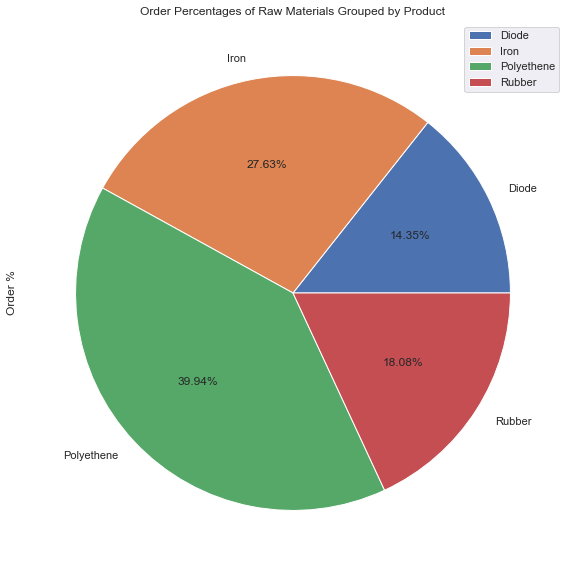

In [84]:
inbound_data_df.plot(kind="pie", subplots=True, figsize=(10, 10), autopct="%.2f%%")
plt.title("Order Percentages of Raw Materials Grouped by Product")
plt.ylabel("Order %")
plt.show()

The plot above provides a visual representation of the orders made from the supplier to the factory, once again highlighting the fact that the majority of orders for raw materials were placed for `Polyethylene`. The second highest being `Iron`. 

It is clear that the strategy for ordering raw materials had to have been adjusted earlier on to account for the increased demand for screws. Hindsight is 20/20 though so it is very easy to say that "this approach should have been executed" or "that approach should have been executed," of which highlights an issue in forecasting customer demand. While the production function required more `Polyethylene`to produce covers and LEDs, the demand for screws exceeded the demand for covers and LEDs. 

In [87]:
inbound_amounts.groupby("product")["round"].mean()

product
Diode         117.101266
Iron          117.101266
Polyethene    117.101266
Rubber        117.101266
Name: round, dtype: float64

Unfortunately, the database does not provide additional round context to make further inferences. The next point of the analysis would have investigated when the demand for screws grew, and when the demand for the other products being covers, LEDs, and grills, decreased. This may have provided insights into a possible pattern that may have developed throughout the game.

This pattern may have revealed insights such as:

* Perhaps the excess orders of `Polyethylene` prevented a severe backlog of the production of covers and LEDs, indicating that the contributor to the backlog of screws may have been that insufficient `Iron` was purchased.
<br><br>
* The issue may have been a lack of communication between the supplier and the customer, leading to an exponential increase in demand for screws, and a steady decrease of other products (covers, LEDs, grills).
<br><br>
* The strategy for forecasting proved to be fruitless as it did not account for an unexpected increase in demand.
<br><br>
* The `bullwhip effect` taking place. The `bullwhip effect` is a phenomenon in supply chain management where small fluctuations in consumer demand can lead to increasingly larger fluctuations in orders placed with suppliers. This ripple effect causes inefficiencies, excess inventory, and increased costs throughout the supply chain.

What is very clear however, is that orders for raw materials had to be adjusted altogether as a backlog of all products developed, with screws being a massive outlier of the products in the backlog. It may be that the production strategy was geared towards minimising stock levels in the warehouse to minimise storage costs and free space up for irregular demand spikes, this was not the case however, highlighting the need to reassess and revise the strategy.

### Open Orders Table

In [5]:
open_orders = pandas.read_sql_query("SELECT * FROM openOrders", connection)
open_orders

C:\Users\richj\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,round,product,amount
0,1,prod01,0
1,1,prod02,0
2,1,prod03,0
3,1,prod04,0
4,2,prod01,2000
...,...,...,...
947,239,prod04,30000
948,240,prod01,0
949,240,prod02,0
950,240,prod03,0


In [6]:
open_orders["product"].unique()

array(['prod01', 'prod02', 'prod03', 'prod04'], dtype=object)

In [7]:
open_orders["product"] = open_orders["product"].map({"prod01": "Polyethene", "prod02": "Iron", "prod03": "Diode", "prod04": "Rubber"})
open_orders

,round,product,amount
0,1,Polyethene,0
1,1,Iron,0
2,1,Diode,0
3,1,Rubber,0
4,2,Polyethene,2000
...,...,...,...
947,239,Rubber,30000
948,240,Polyethene,0
949,240,Iron,0
950,240,Diode,0


In [12]:
open_orders.groupby("product")["amount"].mean().round(0)

product
Diode          9498.0
Iron          18235.0
Polyethene    26223.0
Rubber        11750.0
Name: amount, dtype: float64

<Figure size 800x600 with 0 Axes>

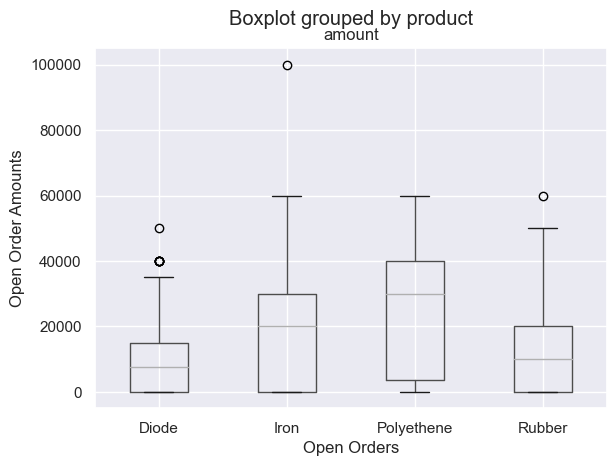

In [36]:
plt.figure(figsize=(8, 6))
open_orders.boxplot(by="product", column=["amount"])

plt.xlabel("Open Orders")
plt.ylabel("Open Order Amounts")
plt.show()

In [39]:
open_orders["amount"].mean()

16426.540966386554

The above plot further acknowledges the number of open orders per product. As observed earlier, when the demand for screws changed, so did the orders for raw materials required to fulfill this demand. The plot above highlights the massive range in open orders for `Iron`, being the outlier of the data. The average number of open orders is `16 426` while the average number of open orders for `Iron` and `Polyethylene` are well and above the median. While outliers are not representative of the entire population, they may provide additional valuable information for further analysis as these are phenomenons that often skew the data in a particular direction.

The average number of open orders for `Polyethylene` comply with what was assumed earlier, which is that the production function required 3x more units per order to fulfill the demand for covers and LEDs. Orders for `Iron` however, are closer to that of `Diode` and `Rubber` but does not quite match the orders for the raw materials likely due to the outliers that have been found. This provides further evidence of a change in customer demand for screws resulting in the change of raw material requirements for the supplier. The supplier had to order more `Iron` as the game progressed. This was not a gradual change to the strategy, but rather, a big reaction to a big change in customer demand. 

### Order Amounts Table

In [55]:
order_amounts = pandas.read_sql_query("SELECT * FROM orderAmounts", connection)
order_amounts

,orderId,round,timestamp,supplier,customer,product,amount
0,5,2,2023-09-12 11:28:54,tier-4,tier-3,prod05,1000
1,5,2,2023-09-12 11:28:54,tier-4,tier-3,prod06,3000
2,5,2,2023-09-12 11:28:54,tier-4,tier-3,prod07,1000
3,5,2,2023-09-12 11:28:54,tier-4,tier-3,prod08,1000
4,6,2,2023-09-12 11:29:21,base,tier-4,prod01,2000
...,...,...,...,...,...,...,...
2787,1653,239,2023-09-15 11:13:28,base,tier-4,prod04,30000
2788,1655,240,2023-09-15 11:14:05,tier-4,tier-3,prod05,10000
2789,1655,240,2023-09-15 11:14:05,tier-4,tier-3,prod06,20000
2790,1655,240,2023-09-15 11:14:05,tier-4,tier-3,prod07,10000


In [56]:
order_amounts["product"] = order_amounts["product"].map({"prod01": "Polyethene", "prod02": "Iron", "prod03": "Diode", "prod04": "Rubber", "prod05": "Cover", "prod06": "Screw", "prod07": "LED", "prod08": "Grill"})

In [57]:
order_amounts["product"].unique()

array(['Cover', 'Screw', 'LED', 'Grill', 'Polyethene', 'Iron', 'Diode',
       'Rubber'], dtype=object)

In [58]:
order_amounts["product"].value_counts()

Cover         378
Screw         378
LED           378
Grill         378
Polyethene    320
Iron          320
Diode         320
Rubber        320
Name: product, dtype: int64

In [59]:
order_amount_mean = order_amounts.groupby(["product", "round"])["amount"].mean()
order_amount_mean_df = pandas.DataFrame(order_amount_mean)

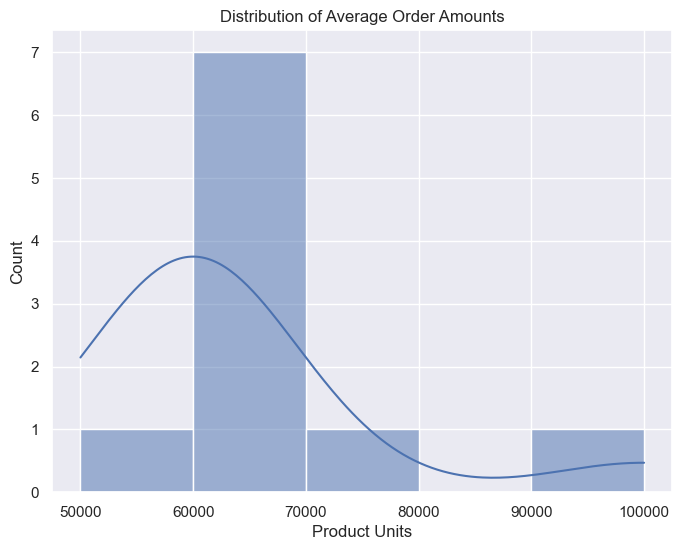

In [76]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Average Order Amounts")
plt.xlabel("Product Units")
plt.ylabel("Count")
sns.histplot(order_amount_mean_df["amount"].nlargest(10).sort_values(), kde=True)
plt.show()

The Kernel Density Estimation (KDE) plot provides a visual representation of the distribution of the average number of orders made. What this plot reveals is that the average number of orders lies within the 5500 and 6500 range where the hump is visible. The `mode`, which is a statistical term used to define "the number that appears the most", lies within that hump. 

The data is skewed to the right, meaning more values are found on the left side (the lower range) than the right side (upper range). The plot reveals the extent of the effects of the outlier orders for `Iron` and `Screws` showing how the sudden change has affected the distribution. With a closer look, it becomes clearer that the outliers have an effect on the distribution as a sudden, but slight, rise in the curve is observed after the 9 000 mark.

The plot overall suggests that any order exceeding 8 000 units is an irregularity and should be treated as such. 

### Orders Table

In [78]:
orders = pandas.read_sql_query("SELECT * FROM orders", connection)
orders

C:\Users\richj\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,orderId,round,timestamp,supplier,customer,orderCosts
0,5,2,2023-09-12 11:28:54,tier-4,tier-3,2000
1,6,2,2023-09-12 11:29:21,base,tier-4,1000
2,9,3,2023-09-12 11:30:11,tier-4,tier-3,2000
3,11,4,2023-09-12 11:30:37,base,tier-4,1000
4,12,4,2023-09-12 11:30:59,base,tier-4,1000
...,...,...,...,...,...,...
692,1649,238,2023-09-15 11:12:19,base,tier-4,1000
693,1651,239,2023-09-15 11:12:47,tier-4,tier-3,2000
694,1652,239,2023-09-15 11:13:12,base,tier-4,1000
695,1653,239,2023-09-15 11:13:28,base,tier-4,1000


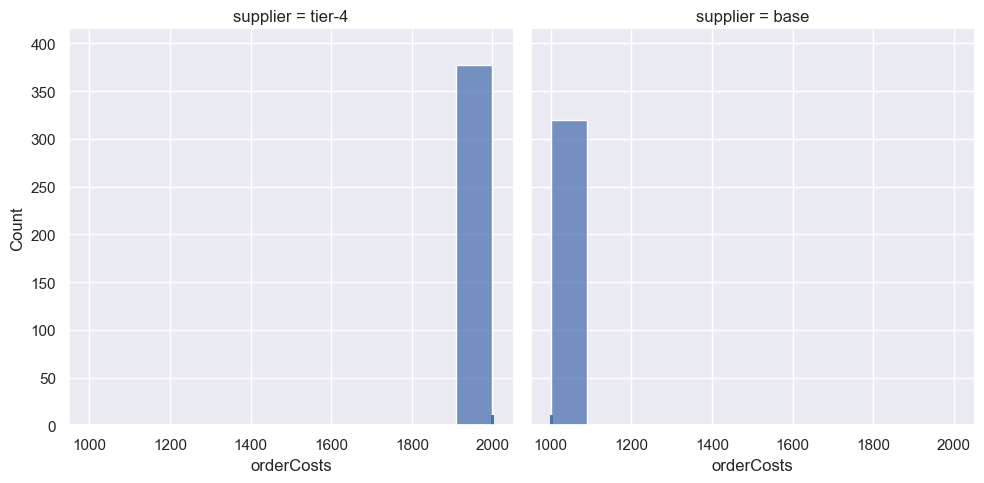

In [101]:
sns.displot(data=orders, x="orderCosts", col="supplier", rug=True)
plt.show()

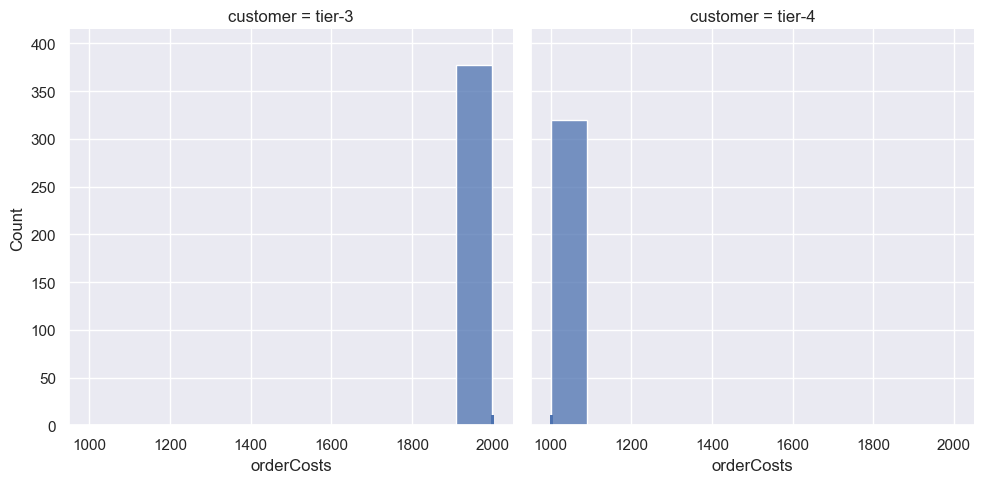

In [102]:
sns.displot(data=orders, x="orderCosts", col="customer", rug=True)
plt.show()

Unfortunately, with limited information, it is not wise to make assumptions on order costs based on the plots above. The plots above suggest that orders from the base supplier are reasonably priced when stacked against ordering from the tier-4 supplier. This may be the case infact as the tier-4 supplier may be an expensive alternative to the base supplier. The same applies to selling to the customer where the plots suggest that the costs associated with selling to tier-4 customers are reasonably priced when compared to the order costs of selling to tier-3 customers, of which may be the alternative.

These plots do provide room to assume that ordering from the base supplier and selling to the base customer should be the preferred option as these are the inexpensive options. The alternative customer and supplier come with higher order costs as they may be operating in different regions, different markets under different laws regarding imports, taxation, etc., of which may be contributors to the higher costs associated. This is merely a suggestion however and not a clear determination of the "best" options.

### Production Amounts Table

In [7]:
prod_amounts = pandas.read_sql_query("SELECT * FROM productionAmounts", connection)
prod_amounts

C:\Users\richj\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,productionId,round,timestamp,product,amount
0,1,3,2023-09-12 11:30:01,prod05,2000
1,1,3,2023-09-12 11:30:01,prod06,0
2,1,3,2023-09-12 11:30:01,prod07,0
3,1,3,2023-09-12 11:30:01,prod08,0
4,5,4,2023-09-12 11:30:54,prod05,0
...,...,...,...,...,...
1583,1480,240,2023-09-15 11:13:45,prod08,0
1584,1481,240,2023-09-15 11:13:57,prod05,0
1585,1481,240,2023-09-15 11:13:57,prod06,40000
1586,1481,240,2023-09-15 11:13:57,prod07,0


In [8]:
prod_amounts = prod_amounts[["round", "product", "amount"]]
prod_amounts

,round,product,amount
0,3,prod05,2000
1,3,prod06,0
2,3,prod07,0
3,3,prod08,0
4,4,prod05,0
...,...,...,...
1583,240,prod08,0
1584,240,prod05,0
1585,240,prod06,40000
1586,240,prod07,0


In [9]:
prod_amounts["product"] = prod_amounts["product"].map({"prod05": "Cover", "prod06": "Screw", "prod07": "LED", "prod08": "Grill"})

C:\Users\richj\AppData\Local\Temp\ipykernel_13488\3571406199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_amounts["product"] = prod_amounts["product"].map({"prod05": "Cover", "prod06": "Screw", "prod07": "LED", "prod08": "Grill"})


In [10]:
prod_amounts["product"].unique()

array(['Cover', 'Screw', 'LED', 'Grill'], dtype=object)

In [11]:
prod_amounts

,round,product,amount
0,3,Cover,2000
1,3,Screw,0
2,3,LED,0
3,3,Grill,0
4,4,Cover,0
...,...,...,...
1583,240,Grill,0
1584,240,Cover,0
1585,240,Screw,40000
1586,240,LED,0


In [119]:
prod_averages = prod_amounts.groupby(["product"])["amount"].mean()
prod_averages

product
Cover     4483.695214
Grill     7170.075567
LED       5681.360202
Screw    10969.823678
Name: amount, dtype: float64

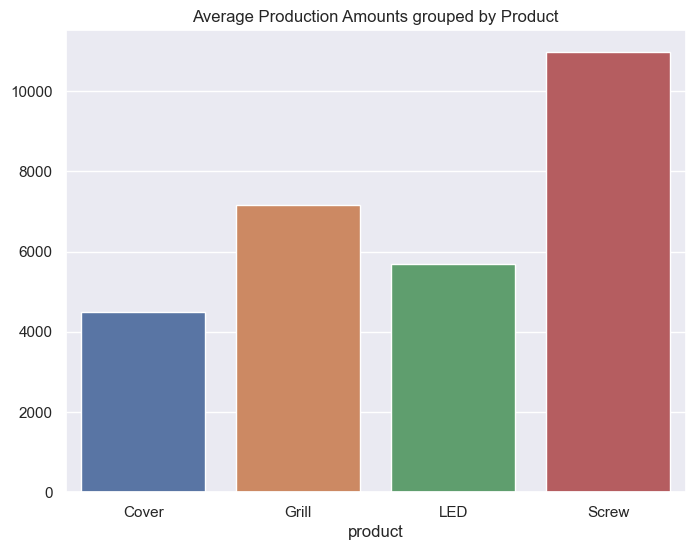

In [125]:
plt.figure(figsize=(8, 6))
plt.title("Average Production Amounts grouped by Product")
sns.barplot(x=prod_averages.index, y=prod_averages.values)
plt.xlabel("Product")
plt.ylabel("")
plt.show()

## Machine Learning & Deeper Statistical Analysis

Having observed the data above, the following steps will involve applying the data to a Random Forest model which is great for both classification and regression tasks. A Random Forest model is a collection of decision trees, where each tree is trained on a random subset of the data and its features. 

A Random Forest model serves itself as a way of analysing the aforementioned data as it is known for its robustness, and its ability to grasp complex relationships between features, all while maintaining resistance to overfitting. Overfitting is referred to as the phenomenon where a model has "memorised" the data it has been trained on and fails to perform when tested on data it has not been exposed to before. Imagine reading a book about driving a car and believing that you have achieved mastery having finished the book, instead of actually driving the car and learning in the "test" environment, out on the road. We want to avoid this.

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

### Data Preprocessing

In [12]:
prod_amounts

,round,product,amount
0,3,Cover,2000
1,3,Screw,0
2,3,LED,0
3,3,Grill,0
4,4,Cover,0
...,...,...,...
1583,240,Grill,0
1584,240,Cover,0
1585,240,Screw,40000
1586,240,LED,0


In [19]:
data = pandas.get_dummies(prod_amounts, columns=["product"], drop_first=False)
data

,round,amount,product_Cover,product_Grill,product_LED,product_Screw
0,3,2000,1,0,0,0
1,3,0,0,0,0,1
2,3,0,0,0,1,0
3,3,0,0,1,0,0
4,4,0,1,0,0,0
...,...,...,...,...,...,...
1583,240,0,0,1,0,0
1584,240,0,1,0,0,0
1585,240,40000,0,0,0,1
1586,240,0,0,0,1,0


The steps below involve splitting the data into 80/20 splits where 80% of the data will be used to train the model, and 20% of the data will be used to test the model to determine how well it has grasped the underlying patterns between the features of the data that have been supplied.

In [20]:
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

In [21]:
train_data

,round,amount,product_Cover,product_Grill,product_LED,product_Screw
0,3,2000,1,0,0,0
1,3,0,0,0,0,1
2,3,0,0,0,1,0
3,3,0,0,1,0,0
4,4,0,1,0,0,0
...,...,...,...,...,...,...
1265,199,0,0,0,0,1
1266,199,0,0,0,1,0
1267,199,9000,0,1,0,0
1268,200,0,1,0,0,0


In [22]:
test_data

,round,amount,product_Cover,product_Grill,product_LED,product_Screw
1270,200,10000,0,0,1,0
1271,200,0,0,1,0,0
1272,200,2,1,0,0,0
1273,200,0,0,0,0,1
1274,200,0,0,0,1,0
...,...,...,...,...,...,...
1583,240,0,0,1,0,0
1584,240,0,1,0,0,0
1585,240,40000,0,0,0,1
1586,240,0,0,0,1,0


In [23]:
train_data.columns

Index(['round', 'amount', 'product_Cover', 'product_Grill', 'product_LED',
       'product_Screw'],
      dtype='object')

#### Spliting into training and test sets

In [24]:
x_train, y_train = train_data[["round", "product_Cover", "product_Grill", "product_LED", "product_Screw"]], train_data["amount"]
x_test, y_test = test_data[["round", "product_Cover", "product_Grill", "product_LED", "product_Screw"]], test_data["amount"]

In [25]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

In [26]:
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [28]:
rfr_predictions = random_forest_model.predict(x_test)
rfr_predictions[:20]  # first 20 predictions

array([ 4987.61904762,  4777.83333333,     0.        , 20348.33333333,
        4987.61904762,  4777.83333333,     0.        , 20348.33333333,
        4987.61904762,  4777.83333333,     0.        , 20348.33333333,
        4987.61904762,  4777.83333333,     0.        , 20348.33333333,
        4987.61904762,  4777.83333333,     0.        , 20348.33333333])

In [29]:
mae = mean_absolute_error(y_test, rfr_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rfr_predictions))

print(f"Random Forest Mean Absolute Error = {mae}")
print(f"Random Forest Root Mean Squared Error = {rmse}")

Random Forest Mean Absolute Error = 11535.387091943696
Random Forest Root Mean Squared Error = 16743.466967419565


### Visualising Model Performance

In [32]:
average_sales = test_data["amount"].mean()
average_sales

9944.974842767295

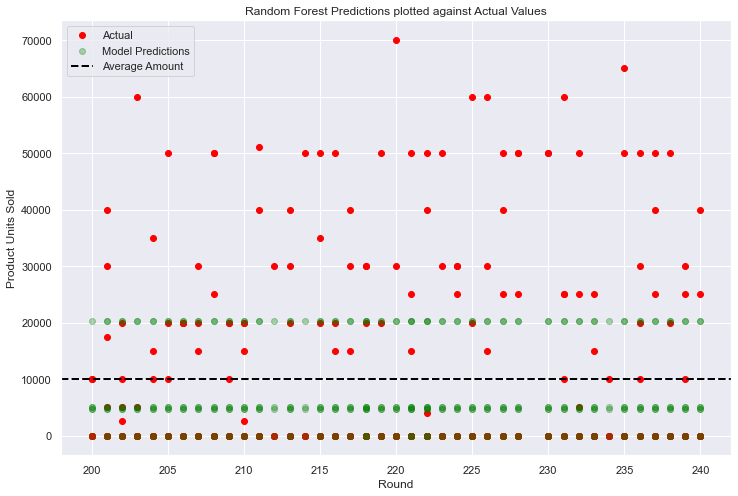

In [38]:
plt.figure(figsize=(12, 8))
plt.title("Random Forest Predictions plotted against Actual Values")
plt.scatter(test_data["round"], test_data["amount"], label="Actual", marker="o", color="red")
plt.scatter(test_data["round"], rfr_predictions, label="Model Predictions", marker="o", alpha=0.3, color="green")
plt.axhline(y=average_sales, color="black", linestyle="--", linewidth=2, label="Average Amount")
plt.xlabel("Round")
plt.ylabel("Product Units Sold")
plt.legend()
plt.show()

### Model Analysis

MAE (Mean Absolute Error) is a measure that calculates the average absolute difference between the actual values and the values that have been predicted by the model. In other words, this measure allows us to observe how close or far off, on average, the model's predictions are from the actual values. The lower this measure is, the better. This is viewed as a good indication of the model's performance.

Root Mean Squared Error (RMSE) is a similar measure to MAE but differs in its ability to give more weight to large errors because it takes the square root of the average squared differences between the model's predicted values and the actual values from the dataset. RMSE penalises large errors contributing to the model's sensitivity to outliers. The same applies for RMSE, the lower the score, the better.

These values returned reveal that the model is performing poorly. This is likely due to many factors that are not only limited to the data (its structure, the values provided, statistics, etc.) but the paramters of the model. One parameter `n_estimators` will be tuned to observe the effect it has on the performance of the model. `n_estimators` refers to the number of "trees" in the random forest model. The next model will be tuned to have 200 "trees" where changes in model performance will be observed.

In [39]:
# Second model
rf_model = RandomForestRegressor(n_estimators=200, random_state=0)

In [40]:
# Fitting the training data
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [41]:
new_preds = rf_model.predict(x_test)
new_preds[:20]

array([ 4982.61904762,  4679.25      ,     0.        , 19810.83333333,
        4982.61904762,  4679.25      ,     0.        , 19810.83333333,
        4982.61904762,  4679.25      ,     0.        , 19810.83333333,
        4982.61904762,  4679.25      ,     0.        , 19810.83333333,
        4982.61904762,  4679.25      ,     0.        , 19810.83333333])

In [42]:
mae = mean_absolute_error(y_test, new_preds)
rmse = np.sqrt(mean_squared_error(y_test, new_preds))

print(f"Random Forest Mean Absolute Error = {mae}")
print(f"Random Forest Root Mean Squared Error = {rmse}")

Random Forest Mean Absolute Error = 11489.039607666966
Random Forest Root Mean Squared Error = 16731.15892709944


As seen above, not much has changed. This may reveal that the model requires further tuning, the data requires further preprocessing, or a completely different model should be used altogether. What is clear though is that the model performed poorly, having over-shot and under-shot many of its predictions. This may be a result of the extreme nature of outliers in the data proving to be challenging for the model to handle. It may also just be a simple case of the data not suiting the requirements of the model, requiring further preprocessing.

# Closing

Link to the final report: https://docs.google.com/document/d/1GOpq_3BOMxbnap3I7gSrr7aJL6zMnzZ_GbY2hIXhoA8/edit?usp=sharing

The above analysis has provided an opportunity to observe many contributors of the sudden change in demand for certain products. It is clear that demand for products exploded possibly leaving the supplier in a situation where varying orders are received, but not handled well. This is most likely the contributor of the large backlog observed earlier in this analysis, a symptom of the `bullwhip effect` phenomenon where a sudden change in demand creates a ripple effect that has a profound impact on key supply chain partners. 

A further analysis of the effect and how it came to be may produce the desired results and lead to the implementation of better and more comprehensive learning models that identify and observe patterns, and generate predicitions that may be used to adjust the production strategy of the supplier. As the strategy may be considered a failure in the context of the game, improvements related to forecasting must be implemented to prevent a re-occurrence of this phenomenon.

#### Sources:

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/#:~:text=But%20by%20choosing%20more%20number,Random%20Forest%20model%20also%20increases.&text=This%20means%20that%20choosing%20a,is%20not%20the%20best%20idea
<br><br>
https://en.wikipedia.org/wiki/Box_plot
<br><br>
https://dietassessmentprimer.cancer.gov/learn/outliers.html#:~:text=Outliers%20are%20important%20because%20they,Learn%20More%20about%20Normal%20Distributions).
<br><br>
https://www.dummies.com/article/academics-the-arts/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set-169773/
<br><br>
https://www.techtarget.com/searcherp/definition/bullwhip-effect
